In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(
    "/kaggle/input/preprocessed-dataset/preprocessed_symptom_disease_dataset.csv"
)

print(df.shape)
df.head()


(1988, 3)


,symptoms,disease,symptoms_clean
0,i have been experiencing a skin rash on my arm...,psoriasis,i have been experiencing a skin rash on my arm...
1,"my skin has been peeling, especially on my kne...",psoriasis,"my skin has been peeling, especially on my kne..."
2,i have been experiencing joint pain in my fing...,psoriasis,i have been experiencing joint pain in my fing...
3,"there is a silver like dusting on my skin, esp...",psoriasis,"there is a silver like dusting on my skin, esp..."
4,"my nails have small dents or pits in them, and...",psoriasis,"my nails have small dents or pits in them, and..."


In [3]:
# Define features and labels

X = df["symptoms_clean"]
y = df["disease"]

In [4]:
# Train Test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 1590
Test size: 398


In [5]:
# TF-IDF Vectorization

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),
    max_df=0.95
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)

TF-IDF train shape: (1590, 9642)


In [6]:
# Logistic Regression with imbalance handling

model = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [7]:
y_pred = model.predict(X_test_tfidf)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9673366834170855


In [9]:
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

                           acne       1.00      1.00      1.00         9
                        allergy       1.00      0.94      0.97        18
                      arthritis       1.00      1.00      1.00        17
               bronchial asthma       0.95      1.00      0.97        18
           cervical spondylosis       1.00      1.00      1.00        17
                    chicken pox       0.85      0.94      0.89        18
                    common cold       0.94      1.00      0.97        17
                         dengue       1.00      0.82      0.90        17
                       diabetes       1.00      0.89      0.94        18
          dimorphic hemorrhoids       1.00      1.00      1.00         8
                  drug reaction       0.94      0.83      0.88        18
               fungal infection       1.00      1.00      1.00        17
gastroesophageal reflux disease       0.94      1.

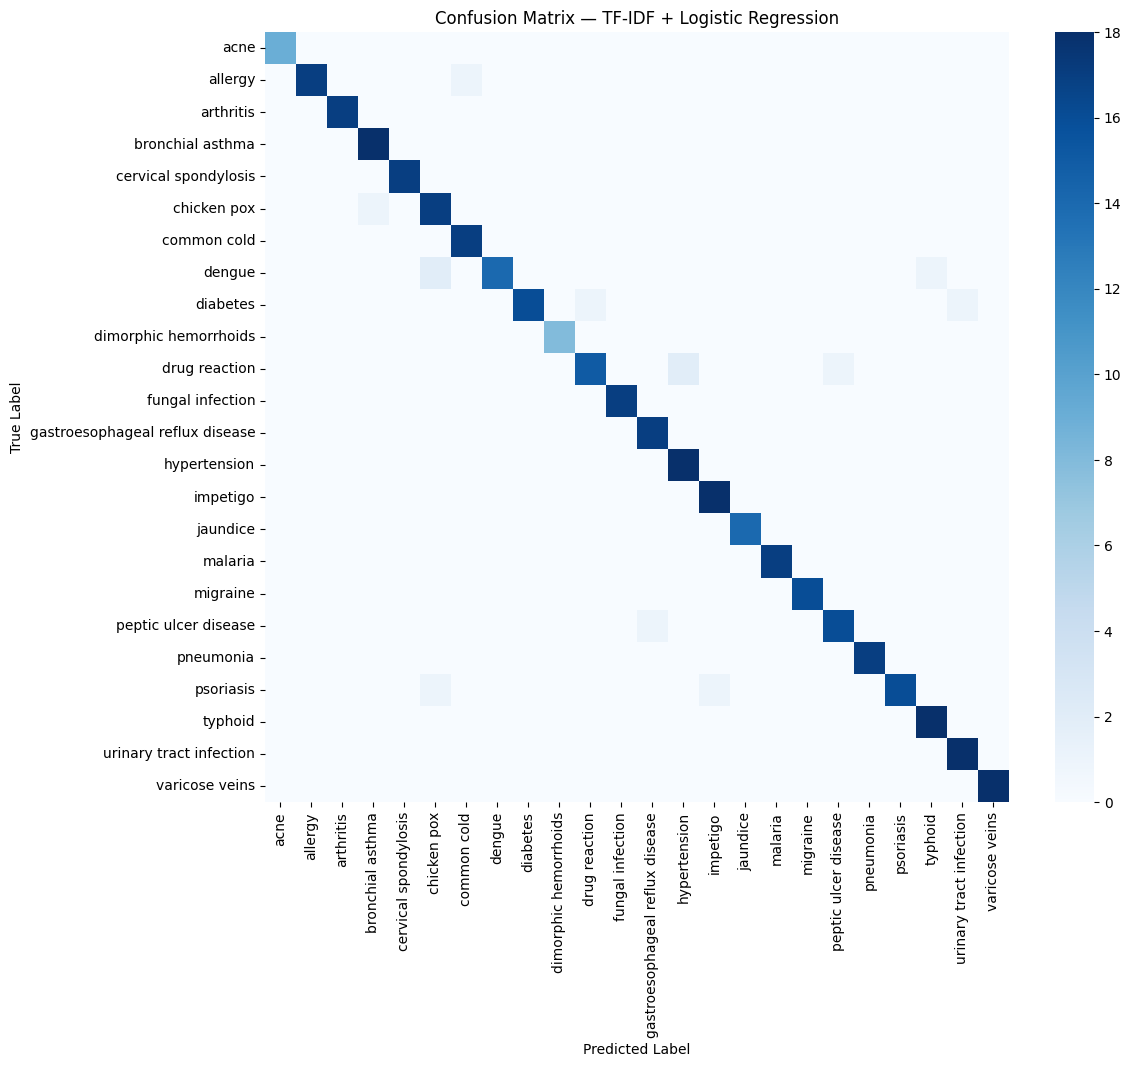

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    xticklabels=model.classes_,
    yticklabels=model.classes_,
    cmap="Blues",
    fmt="d"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — TF-IDF + Logistic Regression")
plt.show()


In [11]:
# Top TF-IDF

feature_names = tfidf.get_feature_names_out()
classes = model.classes_

for i, cls in enumerate(classes[:5]):  # show first 5 classes
    top_features = np.argsort(model.coef_[i])[-10:]
    print(f"\nTop features for class '{cls}':")
    print([feature_names[j] for j in top_features])



Top features for class 'acne':
['scurrying', 'pimples blackheads', 'rash', 'filled pimples', 'pus filled', 'filled', 'skin', 'pimples', 'pus', 'blackheads']

Top features for class 'allergy':
['night', 'sneeze', 'sore', 'lips', 'occasionally', 'breathing', 'sore throat', 'nose', 'throat', 'eyes']

Top features for class 'arthritis':
['weak', 'swollen', 'stiffness', 'walk', 'joints swollen', 'muscles', 'neck', 'walking', 'stiff', 'joints']

Top features for class 'bronchial asthma':
['mucus', 'mucoid', 'tired', 'high', 'fever', 've coughing', 'breathing', 'coughing', 'coughing lot', 'cough']

Top features for class 'cervical spondylosis':
['dizzy', 'pain neck', 'arms legs', 'hurts', 'balance', 'pain', 'cough', 'weakness', 'neck hurts', 'neck']


A baseline NLP model was built using TF-IDF feature extraction with unigrams and bigrams, followed by Logistic Regression.  
To account for class imbalance, class weights inversely proportional to class frequencies were applied during training.  
Model performance was evaluated using accuracy, precision, recall, and F1-score, as well as a confusion matrix.
